In [1]:
from Constants import experimental_db
from DBTypes import *
from typing import Callable
from tqdm.notebook import tqdm
import random

In [2]:
map_war : Callable[['DB_Output_PlayerWar'], float] = lambda o : (o.prob1 * 0.5) + \
    (o.prob2 * 3) + (o.prob3 * 7.5) + (o.prob4 * 15) + (o.prob5 * 25) + (o.prob6 * 35)

In [3]:
cursor = experimental_db.cursor()
ids = experimental_db.execute("SELECT DISTINCT mlbId,year,month FROM Output_PlayerWar WHERE isHitter=1").fetchall()

In [4]:
hitter_dates = {}
for (mlbId, year, month) in tqdm(ids):
    opw = DB_Output_PlayerWar.Select_From_DB(cursor, "WHERE mlbId=? AND year=? AND month=? ORDER BY ModelIdx ASC", (mlbId, year, month))
    model_wars = []
    for o in opw:
        model_wars.append(map_war(o))
    hitter_dates[(mlbId, year, month)] = model_wars

  0%|          | 0/383285 [00:00<?, ?it/s]

In [5]:
hitter_dates[(807712,2025,8)]

[6.681289855390787,
 7.812194816768169,
 6.842796970158815,
 8.849818736314774,
 10.350250653922558,
 10.680302549153566,
 6.413032028824091,
 3.035410686628893,
 6.321809193352237,
 6.41505912411958,
 8.235563514754176,
 12.44167460873723,
 7.2431103847920895,
 7.850078424438834,
 14.766098082996905,
 9.926161969080567,
 7.909199085086584,
 8.674865817651153,
 10.145712537690997,
 5.410644233226776,
 3.4109851913526654,
 8.464660240337253,
 8.676453925669193,
 6.804510127753019,
 8.042877995874733,
 10.111406855285168,
 5.423229835461825,
 14.296096432954073,
 5.730661193840206,
 6.711799563840032,
 8.703036030754447,
 8.719268234446645,
 5.758811146020889,
 12.743853285908699,
 9.005583133548498,
 7.654373766854405,
 9.455011559650302,
 7.1579134203493595,
 3.4381983168423176,
 5.93942285887897,
 8.48681491613388,
 7.73272599466145,
 6.3694806369021535,
 10.334630437195301,
 7.686263402923942,
 4.182460298296064,
 5.7863932037726045,
 10.022003900259733,
 14.005657777190208,
 9.89788

In [6]:
def getWar(values : list[float], num : int, upper : bool) -> float :
    indices = random.sample(range(25, 50), num) if upper else random.sample(range(25), num)
    war = 0
    for i in indices:
        war += values[i]
    return war / num

In [21]:
RUNS_PER_HD = 20

In [ ]:
num_models = []
l1Errors = []
l2Errors = []
for n in tqdm(range(1, 24), desc="Number of Runs"):
    mean_error = 0
    mean_sq_error = 0
    for hd in tqdm(hitter_dates, desc="Hitter-Date pairs", leave=False):
        war_list = hitter_dates[hd]
        for _ in range(RUNS_PER_HD):
            bottom = getWar(war_list, n, False)
            top = getWar(war_list, n, True)
            
            dif = abs(bottom - top)
            mean_error += dif
            mean_sq_error += (dif * dif)
            
    num_models.append(n)
    l1Errors.append(mean_error)
    l2Errors.append(mean_sq_error)

Number of Runs:   0%|          | 0/23 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

Hitter-Date pairs:   0%|          | 0/383285 [00:00<?, ?it/s]

In [8]:
import matplotlib.pyplot as plt

In [22]:
l = len(hitter_dates) * RUNS_PER_HD
l1ErrorsMean = [x / l for x in l1Errors]
l2ErrorsMean = [x / l for x in l2Errors]

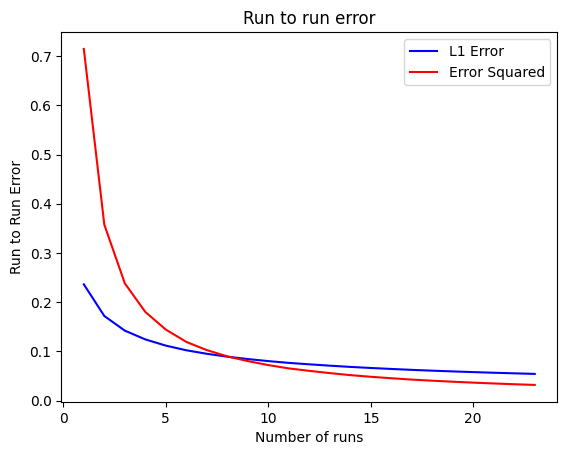

In [27]:
plt.plot(num_models, l1ErrorsMean, label='L1 Error', color='blue')
plt.plot(num_models, l2ErrorsMean, label='Error Squared', color='red')
plt.legend()
plt.title('Run to run error')
plt.xlabel('Number of runs')
plt.ylabel('Run to Run Error')

plt.savefig('aggregation_experiment.png')